In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

## Simulation setup

#### Simulation setup

In [2]:
sim = rw.Simulation()

start simulation


#### Source 

In [24]:
nr_particles = 1*10**3
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1 #1/2**0.5 # (delta_r_rho / delta_r_phi)
energy = 3*10**15 # eV
phi = 0.0
pitch_angle = 2*np.pi * 54.74/360 # pitch angle for equal components in all directions
        

source = rw.PointSourceOriented(energy, source_pos, nr_particles, pitch_angle, phi)
sim.add_source(source)
sim.source.get_description()

Description Source:
                The source defines the start conditions of the particles 
                and covers the position, direction, energy, etc

position:  [0. 0. 0.]
number particles:  1000
energy:  3000000000000000  eV
source tpye: PointSourceOriented
pitch angle:  0.955393232541696
phi:  0.0


#### Propagator

In [25]:
nr_steps = 1*10**4
step_size = 0.5*10**10 # [m]
mfp = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12], dtype=np.float32)  # [m]
rms = 1 # Gaus
magnetic_field = rw.OrderedBackgroundField(rms, [0,0,1]).magnetic_field

propagator = rw.AnisotropicPropagator(magnetic_field, mfp, nr_steps, step_size)
#propagator.set_pitch_angle_const(False)
sim.add_propagator(propagator)
sim.propagator.get_description()

Propagator initialized
Description Propagator:
                The propagator is responsible for the movement of the particles. 
                It performs the change of direction and the movement in the respective direction.
                There are two phases:
                 - change direction with probability (see below)
                 - move in all directions
                The movement takes place according to the random walk (RW).

propagation tpye: AnisotropicPropagator
Description Propagator:
                The propagator is responsible for the movement of the particles. 
                It performs the change of direction and the movement in the respective direction.
                There are two phases:
                 - change direction with probability (see below)
                 - move in all directions
                The movement takes place according to the random walk (RW).

coordinates: Cylindrical coordinates
dimensions:  3
pitch angle: constant
particle sp

#### Observer

In [35]:
substeps = [False, False, True] # observe only steps (no substeps)
spheres = [1*10**13, 3*10**12]

observer = rw.SphericalObserver(substeps, spheres)

sim.add_observer(observer)
sim.observer.get_description()

number steps:  0
Observer initialized
Description Observer:
                The observer defines the conditions for when to write data to the output.

observer tpye: SphericalObserver
spheres:  [-1.e+00  1.e+13  3.e+12]
steps [0:10]:  []
steps [-11:-1]:  []
nr steps:  0
substeps:  [False False  True]
all_steps:  False


In [36]:
%time sim.run_simulation()
sim.save_data('data/data_sim')

CPU times: user 16 s, sys: 3.61 ms, total: 16 s
Wall time: 16 s


## Analyze statistics


In [37]:
df = pd.read_pickle("data/data_sim.pkl")
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,4417.0,2.275481e+13,1.190016e+12,1.569842e+11,-2.750797e+12,122.768364,0.955393,3.000000e+12,2.0
1,0.0,6319.0,3.370529e+13,1.067595e+12,2.799284e+11,-2.785435e+12,204.222794,0.955393,3.000000e+12,2.0
2,1.0,1031.0,8.928466e+12,3.508088e+11,1.608036e+11,2.975942e+12,24.734226,0.955393,3.000000e+12,2.0
3,1.0,2932.0,1.992656e+13,2.919911e+10,8.753086e+10,2.996147e+12,-70.255249,0.955393,3.000000e+12,2.0
4,1.0,3384.0,2.253134e+13,1.242932e+11,2.090945e+11,2.990374e+12,-92.839386,0.955393,3.000000e+12,2.0
...,...,...,...,...,...,...,...,...,...,...
4207,998.0,9819.0,4.676165e+13,-4.524924e+11,-9.930122e+11,-9.937806e+12,-76.400932,0.955393,1.000000e+13,2.0
4208,999.0,1039.0,8.997748e+12,-8.906835e+10,-2.517589e+10,2.999034e+12,40.724216,0.955393,3.000000e+12,2.0
4209,999.0,1108.0,9.393230e+12,3.209845e+10,-1.349843e+11,2.996147e+12,44.172058,0.955393,3.000000e+12,2.0
4210,999.0,6420.0,3.409901e+13,-1.918805e+11,-3.613998e+11,-2.973056e+12,-5.896215,0.955393,3.000000e+12,2.0


3000000053248.0
[3.00000005e+12 9.99999983e+12]


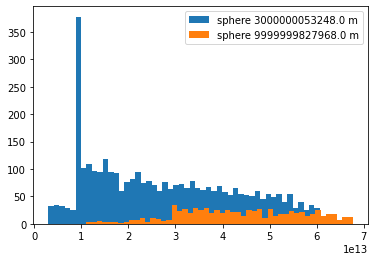

In [44]:
print(spheres[0])
spheres = df['radius'].unique()
print(spheres)
for sphere in spheres:
    df_sphere = df.loc[df['radius'] == sphere]
    plt.hist(df_sphere['d'], bins = 50, label='sphere '+str(sphere)+' m')
    
plt.legend()
plt.show()